<a href="https://colab.research.google.com/github/mbargaa/Python/blob/main/individual_task_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_df = pd.read_csv('/content/train.csv')
#Use Pandas methods to explore and understand the dataset:


In [ ]:
#Display the first few rows to get an overview of the data structure.
titanic_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Check the dimensions of the dataset (number of rows and columns).

rows, columns = titanic_df.shape
print(f"There are {rows} rows in the dataset, and {columns} columns.")

There are 891 rows in the dataset, and 12 columns.


In [ ]:
#Identify missing values and decide on strategies for handling them.

missing_values = titanic_df.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

numerical_columns = titanic_df.select_dtypes(include=['number'])

#Max
for column in numerical_columns.columns:
    print(f"Maximum value in {column} column: {titanic_df[column].max()}")

#min
for column in numerical_columns.columns:
    print(f"Minimum value in {column} column: {titanic_df[column].min()}")

#median
for column in numerical_columns.columns:
    print(f"Median value in {column} column: {titanic_df[column].median()}")

#mean
for column in numerical_columns.columns:
    print(f"Mean value in {column} column: {titanic_df[column].mean()}")

Maximum value in PassengerId column: 891
Maximum value in Survived column: 1
Maximum value in Pclass column: 3
Maximum value in Age column: 80.0
Maximum value in SibSp column: 8
Maximum value in Parch column: 6
Maximum value in Fare column: 512.3292
Minimum value in PassengerId column: 1
Minimum value in Survived column: 0
Minimum value in Pclass column: 1
Minimum value in Age column: 0.42
Minimum value in SibSp column: 0
Minimum value in Parch column: 0
Minimum value in Fare column: 0.0
Median value in PassengerId column: 446.0
Median value in Survived column: 0.0
Median value in Pclass column: 3.0
Median value in Age column: 28.0
Median value in SibSp column: 0.0
Median value in Parch column: 0.0
Median value in Fare column: 14.4542
Mean value in PassengerId column: 446.0
Mean value in Survived column: 0.3838383838383838
Mean value in Pclass column: 2.308641975308642
Mean value in Age column: 29.69911764705882
Mean value in SibSp column: 0.5230078563411896
Mean value in Parch column:

In [ ]:
#Analyze categorical variables (e.g., value counts).

# How many males and females were on board?

frequency_count = titanic_df['Sex'].value_counts()
print(frequency_count)

Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
titanic_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


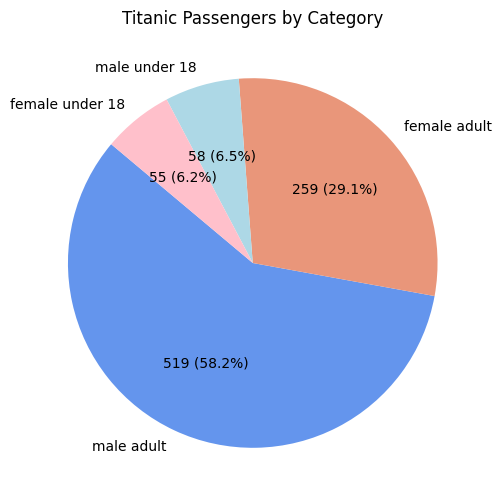

In [ ]:
#Create function that categorizes people into children and adults
def categorize_age(age):
    if age < 18:
        return 'under 18'
    else:
        return 'adult'

titanic_df['Age Group'] = titanic_df['Age'].apply(categorize_age)

#Create new column for combining Sex and Age
titanic_df['Category'] = titanic_df['Sex']  + ' ' +  titanic_df['Age Group']

#Count the occurrences of each category
category_counts = titanic_df['Category'].value_counts()

colors = {
    'male under 18': 'lightblue',
    'female under 18': 'pink',
    'male adult': 'cornflowerblue',
    'female adult': 'darksalmon'
}

#Set colors to the categories
category_colors = [colors[category] for category in category_counts.index]


# Define a function to format labels with both value and percentage
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

#Plot the Pie Chart
plt.figure(figsize=(6,6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct=lambda pct: func(pct, category_counts),
    colors=category_colors,
    startangle=140
)
plt.title('Titanic Passengers by Category')



plt.show()


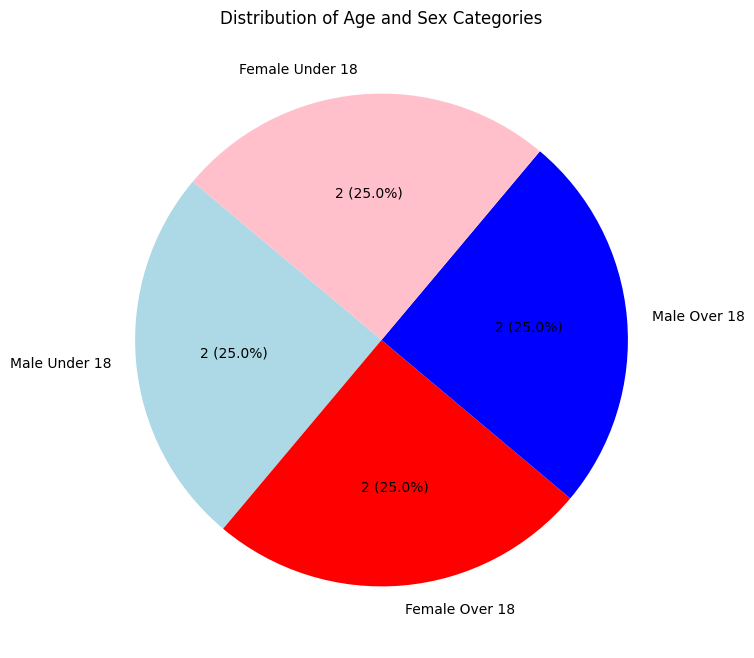

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example: Sample DataFrame
data = {
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [14, 23, 45, 17, 30, 16, 12, 25]
}
df = pd.DataFrame(data)

# Step 1: Categorize the Age Groups directly using np.where
df['Age Group'] = np.where(df['Age'] < 18, 'Under 18', 'Over 18')

# Step 2: Create a new column for combining Sex and Age Group
df['Category'] = df['Sex'] + ' ' + df['Age Group']

# Step 3: Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Define the color mapping for each category
colors = {
    'Male Under 18': 'lightblue',  # Baby blue for underage males
    'Female Under 18': 'pink',     # Pink for underage females
    'Male Over 18': 'blue',        # Blue for males over 18
    'Female Over 18': 'red'        # Red for females over 18
}

# Map the colors to the categories
category_colors = [colors[category] for category in category_counts.index]

# Define a function to format labels with both value and percentage
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

# Step 4: Plot the Pie Chart
plt.figure(figsize=(8, 8))  # Create a figure with a specific size
plt.pie(
    category_counts,
    labels=[f'{label}' for label in category_counts.index],  # Use the categories as labels
    autopct=lambda pct: func(pct, category_counts),  # Add value and percentage inside slices
    colors=category_colors,  # Apply custom colors
    startangle=140
)

# Adding a title
plt.title('Distribution of Age and Sex Categories')

# Show the pie chart
plt.show()
